<a href="https://colab.research.google.com/github/joedetDS/misery_index_sub_sahara/blob/main/MI_Sub_sahara(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries

import pandas as pd
import numpy as np

#model and preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import mean_squared_error, r2_score

#plots
import matplotlib.pyplot as plt
import seaborn as sns

#model saving and loading
import joblib

#off warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# Load the datasets
df= pd.read_csv('/content/merged_data.csv')

In [3]:
#First five rows

df.head(5)

,year,country,inflation,temp,wind_speed,humidity,cloud_cover,precip,ocean_heat_content,co2,ocean_ph,sea_level,glacier_mass_balance,arctic_sea_ice_extent,antarctic_sea_ice_extent,unemployment
0,1991,Angola,106.3099823,21.82,1.84,54.40,68.35,213.44,0.97,372.11,8.10,13.80,-37.69,7.65,2.95,16.468
1,1991,Benin,0.75662015,20.26,5.78,43.03,41.16,765.37,1.33,400.38,8.14,7.02,-60.76,7.57,2.89,1.639
2,1991,Botswana,5.177709937,27.15,2.30,45.64,38.60,203.09,0.58,383.73,8.12,5.95,-30.66,7.96,2.21,13.820
3,1991,Burkina Faso,-3.967780748,26.82,4.52,49.10,57.99,265.67,2.41,367.07,8.16,19.31,-75.95,6.97,2.87,2.468
4,1991,Burundi,4.093140793,26.79,1.39,50.33,32.77,206.10,0.21,370.98,8.25,4.16,-18.45,6.71,2.91,3.168


In [4]:
# display columns present in the dataset

df.columns

Index(['year', 'country', 'inflation', 'temp', 'wind_speed', 'humidity',
       'cloud_cover', 'precip', 'ocean_heat_content', 'co2', 'ocean_ph',
       'sea_level', 'glacier_mass_balance', 'arctic_sea_ice_extent',
       'antarctic_sea_ice_extent', 'unemployment'],
      dtype='object')

In [5]:
#check if null values are present

df.isna().sum()

,0
year,0
country,0
inflation,0
temp,0
wind_speed,0
humidity,0
cloud_cover,0
precip,0
ocean_heat_content,0
co2,0


In [6]:
#statistical info of the dataset

df.describe()

,year,temp,wind_speed,humidity,cloud_cover,precip,ocean_heat_content,co2,ocean_ph,sea_level,glacier_mass_balance,arctic_sea_ice_extent,antarctic_sea_ice_extent,unemployment
count,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1485.000000
mean,2007.000000,25.940211,3.509440,58.311891,49.613696,740.373847,1.243248,381.903603,8.153169,14.554315,-51.303333,8.201871,2.498235,8.805314
std,9.525042,3.879914,1.453072,17.194328,11.399379,481.858293,0.725431,18.704181,0.085414,8.623595,28.774501,1.015374,0.284077,7.371422
min,1991.000000,15.050000,1.000000,10.160000,30.010000,2.650000,0.000000,350.010000,8.000000,0.010000,-99.990000,6.500000,2.000000,0.317000
25%,1999.000000,23.110000,2.230000,46.497500,39.990000,361.935000,0.590000,365.080000,8.080000,6.950000,-76.355000,7.290000,2.260000,3.191000
50%,2007.000000,25.775000,3.550000,58.120000,48.975000,636.585000,1.260000,381.885000,8.150000,14.470000,-52.560000,8.200000,2.490000,5.372000
75%,2015.000000,28.477500,4.750000,71.192500,59.460000,1090.157500,1.850000,397.900000,8.230000,21.897500,-25.655000,9.080000,2.740000,14.660000
max,2023.000000,39.850000,6.000000,89.960000,69.960000,1996.910000,2.500000,414.940000,8.300000,29.940000,-0.010000,10.000000,3.000000,37.852000


In [7]:
#drop null values present

df.dropna(inplace=True)

In [8]:
#check again to see if null have been dropped

df.isna().sum()

,0
year,0
country,0
inflation,0
temp,0
wind_speed,0
humidity,0
cloud_cover,0
precip,0
ocean_heat_content,0
co2,0


In [9]:
#number of R and C present in the dataset

df.shape

(1485, 16)

# PCA Application

In [10]:
#climatic factors

climatic_factors = ['temp', 'wind_speed', 'humidity',
       'cloud_cover', 'precip', 'ocean_heat_content', 'co2', 'ocean_ph',
       'sea_level', 'glacier_mass_balance', 'arctic_sea_ice_extent',
       'antarctic_sea_ice_extent']

In [11]:
#import pca library

from sklearn.decomposition import PCA

In [12]:
# Extract the climatic data and standardize it
climate_data_scaled = StandardScaler().fit_transform(df[climatic_factors])


In [13]:
# Apply PCA
pca = PCA()
pca.fit(climate_data_scaled)

PCA()

In [14]:
# Get explained variance ratio for understanding contribution
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio

array([0.15320971, 0.09163113, 0.08929444, 0.08885369, 0.08690782,
       0.08474172, 0.0811339 , 0.08014671, 0.07914339, 0.07479641,
       0.07216543, 0.01797568])

This array shows the proportion of variance explained by each principal component. Each number tells how much of the total variance in the dataset is captured by that principal component.

1. PC1 explains 15.32% of the total variance in the dataset.
2. PC2 explains 9.16% of the total variance, and so on.
3. The last component (PC12) explains just 1.8% of the variance, which is quite small.

Since we are looking for a single column we can regard as the climatic index, we can stick with the first PC as it explain the most variance of the dataset

In [15]:
# Get the first principal component as weights for Climate Index
weights = pca.components_[0]

weights

array([-0.25389653,  0.04812157,  0.68928415,  0.02570981,  0.67001776,
        0.02445109,  0.01903527,  0.02432327, -0.07273952, -0.02770495,
       -0.01520537, -0.02611164])

In [16]:
# Compute the Climate Index
df['climate_index'] = climate_data_scaled.dot(weights)

In [17]:
climate_data_scaled

array([[-1.05309575, -1.14953101, -0.20992753, ...,  0.474333  ,
        -0.54115962,  1.59254027],
       [-1.45398271,  1.56870712, -0.87019567, ..., -0.32831441,
        -0.61999633,  1.38084465],
       [ 0.31660137, -0.83217326, -0.71863016, ...,  0.71891954,
        -0.23566736, -1.01837234],
       ...,
       [ 0.14956514,  0.70632193,  1.06415189, ..., -1.37067749,
         0.59211813, -1.44176357],
       [ 0.63011553, -0.56310908, -0.02874577, ..., -0.14183022,
         0.99615628, -0.17158987],
       [-0.4106487 , -1.31510896,  0.05139232, ...,  1.0727524 ,
        -1.30981757, -1.30063316]])

In [18]:
df

,year,country,inflation,temp,wind_speed,humidity,cloud_cover,precip,ocean_heat_content,co2,ocean_ph,sea_level,glacier_mass_balance,arctic_sea_ice_extent,antarctic_sea_ice_extent,unemployment,climate_index
0,1991,Angola,106.3099823,21.82,1.84,54.40,68.35,213.44,0.97,372.11,8.10,13.80,-37.69,7.65,2.95,16.468,-0.683987
1,1991,Benin,0.75662015,20.26,5.78,43.03,41.16,765.37,1.33,400.38,8.14,7.02,-60.76,7.57,2.89,1.639,-0.064695
2,1991,Botswana,5.177709937,27.15,2.30,45.64,38.60,203.09,0.58,383.73,8.12,5.95,-30.66,7.96,2.21,13.820,-1.321400
3,1991,Burkina Faso,-3.967780748,26.82,4.52,49.10,57.99,265.67,2.41,367.07,8.16,19.31,-75.95,6.97,2.87,2.468,-1.015842
4,1991,Burundi,4.093140793,26.79,1.39,50.33,32.77,206.10,0.21,370.98,8.25,4.16,-18.45,6.71,2.91,3.168,-1.180258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,2023,Sudan,206.9147305,21.71,5.55,51.86,50.84,350.51,2.19,387.56,8.05,9.62,-23.12,9.84,2.35,11.449,-0.418649
1514,2023,Togo,2.594565299,27.72,4.14,69.73,67.16,929.23,1.89,394.56,8.07,29.94,-67.26,9.36,2.89,2.048,0.528002
1515,2023,Uganda,7.958749957,26.50,4.53,76.34,32.90,1336.26,1.18,408.78,8.18,2.55,-90.72,8.80,2.09,2.831,1.729082
1516,2023,Zambia,8.885082557,28.37,2.69,57.52,65.07,445.29,2.14,354.28,8.30,10.08,-55.40,9.21,2.45,5.913,-0.494959


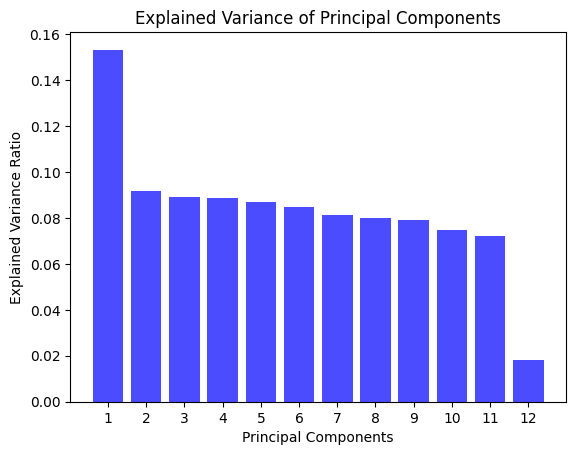

In [19]:
# Explained variance array
explained_variance = np.array([0.15320971, 0.09163113, 0.08929444, 0.08885369, 0.08690782,
                               0.08474172, 0.0811339 , 0.08014671, 0.07914339, 0.07479641,
                               0.07216543, 0.01797568])

plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.title('Explained Variance of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

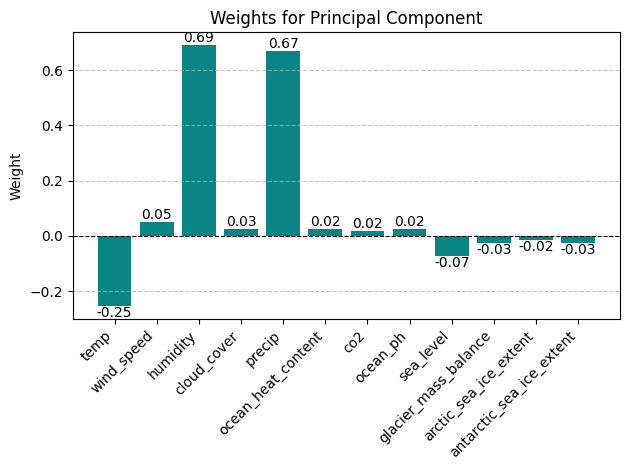

In [20]:
import matplotlib.pyplot as plt

plt.bar(climatic_factors, weights, color='teal', alpha=0.8)

# Add value labels inside the bars
bars = plt.bar(climatic_factors, weights, color='teal', alpha=0.8)
plt.bar_label(bars, fmt='%.2f', label_type='edge')

plt.title('Weights for Principal Component')
plt.ylabel('Weight')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
df.columns

Index(['year', 'country', 'inflation', 'temp', 'wind_speed', 'humidity',
       'cloud_cover', 'precip', 'ocean_heat_content', 'co2', 'ocean_ph',
       'sea_level', 'glacier_mass_balance', 'arctic_sea_ice_extent',
       'antarctic_sea_ice_extent', 'unemployment', 'climate_index'],
      dtype='object')

In [22]:
df["inflation"] = pd.to_numeric(df["inflation"], errors="coerce")
df["unemployment"] = pd.to_numeric(df["unemployment"], errors="coerce")


df["misery_index"] = df["inflation"] + df["unemployment"]

In [23]:
df

,year,country,inflation,temp,wind_speed,humidity,cloud_cover,precip,ocean_heat_content,co2,ocean_ph,sea_level,glacier_mass_balance,arctic_sea_ice_extent,antarctic_sea_ice_extent,unemployment,climate_index,misery_index
0,1991,Angola,106.309982,21.82,1.84,54.40,68.35,213.44,0.97,372.11,8.10,13.80,-37.69,7.65,2.95,16.468,-0.683987,122.777982
1,1991,Benin,0.756620,20.26,5.78,43.03,41.16,765.37,1.33,400.38,8.14,7.02,-60.76,7.57,2.89,1.639,-0.064695,2.395620
2,1991,Botswana,5.177710,27.15,2.30,45.64,38.60,203.09,0.58,383.73,8.12,5.95,-30.66,7.96,2.21,13.820,-1.321400,18.997710
3,1991,Burkina Faso,-3.967781,26.82,4.52,49.10,57.99,265.67,2.41,367.07,8.16,19.31,-75.95,6.97,2.87,2.468,-1.015842,-1.499781
4,1991,Burundi,4.093141,26.79,1.39,50.33,32.77,206.10,0.21,370.98,8.25,4.16,-18.45,6.71,2.91,3.168,-1.180258,7.261141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,2023,Sudan,206.914730,21.71,5.55,51.86,50.84,350.51,2.19,387.56,8.05,9.62,-23.12,9.84,2.35,11.449,-0.418649,218.363731
1514,2023,Togo,2.594565,27.72,4.14,69.73,67.16,929.23,1.89,394.56,8.07,29.94,-67.26,9.36,2.89,2.048,0.528002,4.642565
1515,2023,Uganda,7.958750,26.50,4.53,76.34,32.90,1336.26,1.18,408.78,8.18,2.55,-90.72,8.80,2.09,2.831,1.729082,10.789750
1516,2023,Zambia,8.885083,28.37,2.69,57.52,65.07,445.29,2.14,354.28,8.30,10.08,-55.40,9.21,2.45,5.913,-0.494959,14.798083


In [24]:
df.dropna(inplace=True)

In [25]:
df.head()

,year,country,inflation,temp,wind_speed,humidity,cloud_cover,precip,ocean_heat_content,co2,ocean_ph,sea_level,glacier_mass_balance,arctic_sea_ice_extent,antarctic_sea_ice_extent,unemployment,climate_index,misery_index
0,1991,Angola,106.309982,21.82,1.84,54.40,68.35,213.44,0.97,372.11,8.10,13.80,-37.69,7.65,2.95,16.468,-0.683987,122.777982
1,1991,Benin,0.756620,20.26,5.78,43.03,41.16,765.37,1.33,400.38,8.14,7.02,-60.76,7.57,2.89,1.639,-0.064695,2.395620
2,1991,Botswana,5.177710,27.15,2.30,45.64,38.60,203.09,0.58,383.73,8.12,5.95,-30.66,7.96,2.21,13.820,-1.321400,18.997710
3,1991,Burkina Faso,-3.967781,26.82,4.52,49.10,57.99,265.67,2.41,367.07,8.16,19.31,-75.95,6.97,2.87,2.468,-1.015842,-1.499781
4,1991,Burundi,4.093141,26.79,1.39,50.33,32.77,206.10,0.21,370.98,8.25,4.16,-18.45,6.71,2.91,3.168,-1.180258,7.261141


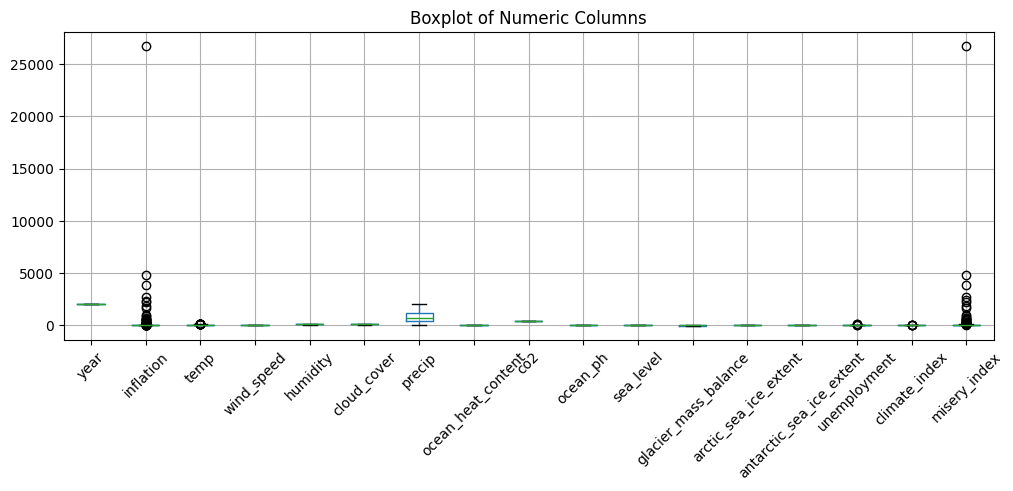

In [26]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
# Boxplot for all numeric columns
df[numeric_columns].boxplot()
plt.title("Boxplot of Numeric Columns")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


The outliers seems so far off. removing them could increase and better the predictive power

In [27]:
# Outlier removal using IQR
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows outside the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [28]:
df.shape

(1246, 18)

In [29]:
df.misery_index.describe()

,misery_index
count,1246.000000
mean,15.462510
std,10.856491
min,-12.246554
25%,6.758247
50%,13.032557
75%,24.136211
max,49.860942


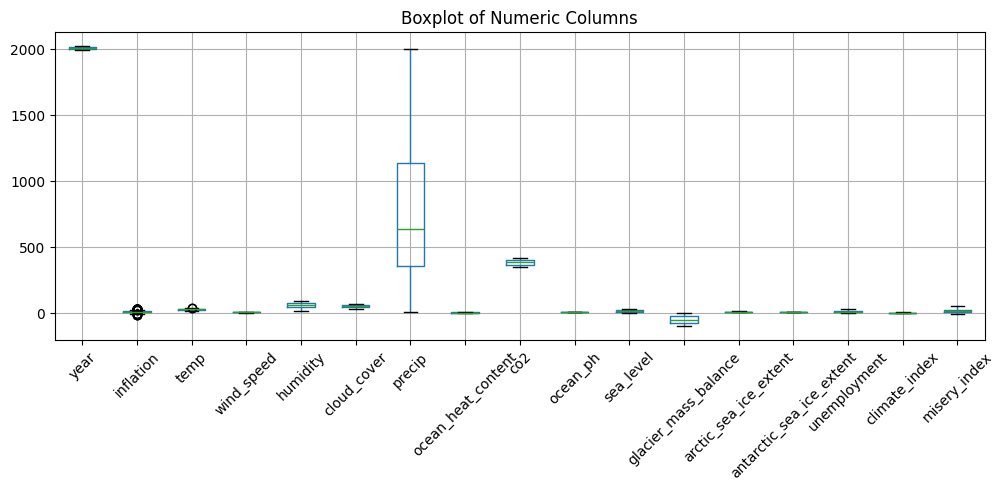

In [30]:
#View of Boxplot after removing outliers

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
# Boxplot for all numeric columns
df[numeric_columns].boxplot()
plt.title("Boxplot of Numeric Columns")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [31]:
df.columns

Index(['year', 'country', 'inflation', 'temp', 'wind_speed', 'humidity',
       'cloud_cover', 'precip', 'ocean_heat_content', 'co2', 'ocean_ph',
       'sea_level', 'glacier_mass_balance', 'arctic_sea_ice_extent',
       'antarctic_sea_ice_extent', 'unemployment', 'climate_index',
       'misery_index'],
      dtype='object')

In [32]:
# Separate target and features
X = df[['inflation','unemployment', 'climate_index']]  # Features
y = df['misery_index']  # Target variable


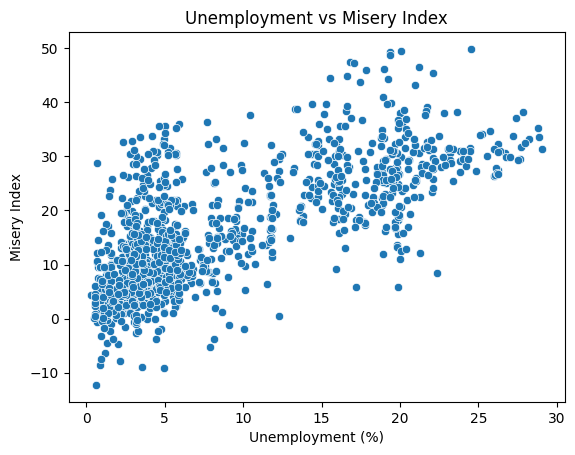

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Unemployment vs Misery Index
sns.scatterplot(x=df['unemployment'], y=y)
plt.title('Unemployment vs Misery Index')
plt.xlabel('Unemployment (%)')
plt.ylabel('Misery Index')
plt.show()


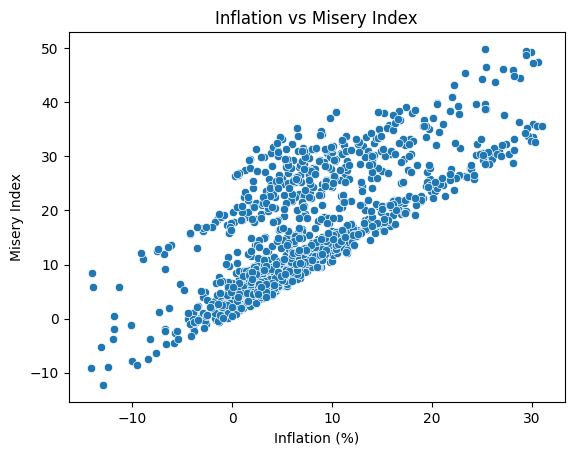

In [34]:
# Scatter plot: Inflation vs Misery Index
sns.scatterplot(x=df['inflation'], y=y)
plt.title('Inflation vs Misery Index')
plt.xlabel('Inflation (%)')
plt.ylabel('Misery Index')
plt.show()


In [35]:
df

,year,country,inflation,temp,wind_speed,humidity,cloud_cover,precip,ocean_heat_content,co2,ocean_ph,sea_level,glacier_mass_balance,arctic_sea_ice_extent,antarctic_sea_ice_extent,unemployment,climate_index,misery_index
1,1991,Benin,0.756620,20.26,5.78,43.03,41.16,765.37,1.33,400.38,8.14,7.02,-60.76,7.57,2.89,1.639,-0.064695,2.395620
2,1991,Botswana,5.177710,27.15,2.30,45.64,38.60,203.09,0.58,383.73,8.12,5.95,-30.66,7.96,2.21,13.820,-1.321400,18.997710
3,1991,Burkina Faso,-3.967781,26.82,4.52,49.10,57.99,265.67,2.41,367.07,8.16,19.31,-75.95,6.97,2.87,2.468,-1.015842,-1.499781
4,1991,Burundi,4.093141,26.79,1.39,50.33,32.77,206.10,0.21,370.98,8.25,4.16,-18.45,6.71,2.91,3.168,-1.180258,7.261141
5,1991,Cameroon,3.568714,20.93,3.91,85.18,42.70,1142.10,0.85,386.97,8.28,7.79,-21.94,7.12,2.72,8.933,2.030702,12.501714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,2023,Somalia,10.214669,22.97,4.44,45.89,37.74,308.85,0.50,381.26,8.29,5.82,-39.96,6.67,2.78,19.027,-0.802856,29.241669
1511,2023,South Africa,4.524764,24.35,4.36,69.99,67.84,992.03,1.40,412.79,8.28,21.49,-32.78,8.19,2.94,27.988,0.967020,32.512764
1514,2023,Togo,2.594565,27.72,4.14,69.73,67.16,929.23,1.89,394.56,8.07,29.94,-67.26,9.36,2.89,2.048,0.528002,4.642565
1515,2023,Uganda,7.958750,26.50,4.53,76.34,32.90,1336.26,1.18,408.78,8.18,2.55,-90.72,8.80,2.09,2.831,1.729082,10.789750


In [36]:
# Save the dataset after cleaning and applying PCA
data_with_pca = df[['inflation', 'unemployment', 'climate_index', 'misery_index']]

# Specify the file name and save the DataFrame to a CSV file
data_with_pca.to_csv('cleaned_data_with_pca.csv', index=False)

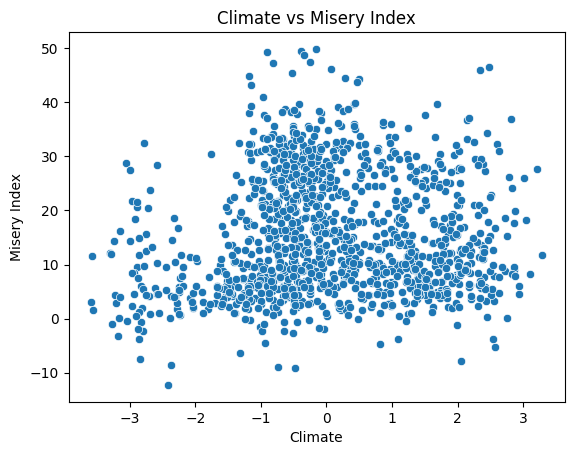

In [37]:
# Scatter plot: Combined Climatic vs Misery Index
sns.scatterplot(x=df['climate_index'], y=y)
plt.title('Climate vs Misery Index')
plt.xlabel('Climate')
plt.ylabel('Misery Index')
plt.show()


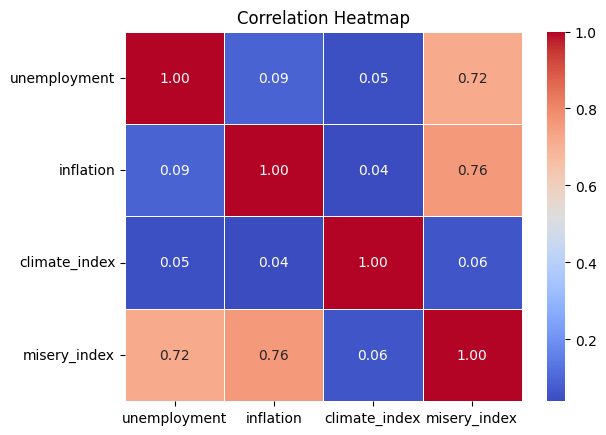

In [38]:
# Correlation heatmap
corr_matrix = df[['unemployment', 'inflation', 'climate_index', 'misery_index']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

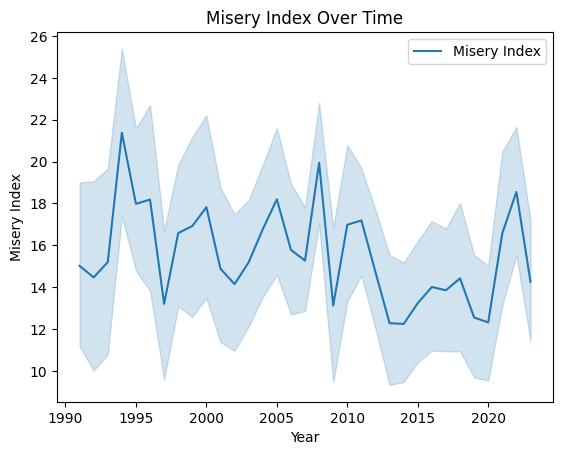

In [39]:
sns.lineplot(x=df['year'], y=y, label='Misery Index')
plt.title('Misery Index Over Time')
plt.xlabel('Year')
plt.ylabel('Misery Index')
plt.show()


# Machine Learning

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')


Mean Squared Error (MSE): 0.5683965885456428
R-squared: 0.9952973193436002


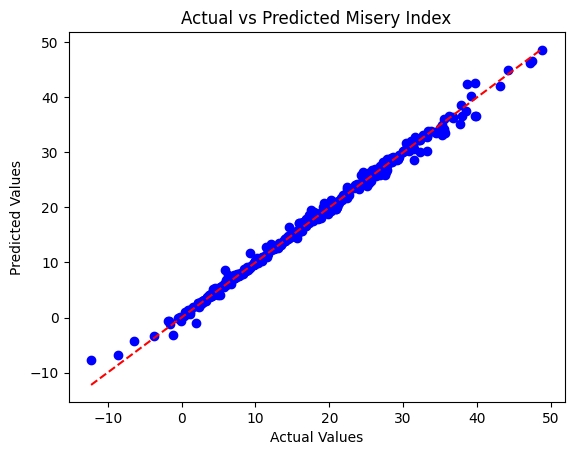

In [41]:
# Visualizing predictions vs actual values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Misery Index')
plt.show()

In [42]:
# Save the trained model
joblib.dump(model, 'misery_index_model.pkl')

['misery_index_model.pkl']

In [43]:
# Load the saved model
loaded_model = joblib.load('misery_index_model.pkl')

# Select the first row for prediction (excluding 'misery_index', 'country', 'year')
first_row = df[['unemployment', 'inflation', 'climate_index']].iloc[0]

first_row

,1
unemployment,1.639000
inflation,0.756620
climate_index,-0.064695


In [44]:
# Reshape the first row to match the model input shape (as the model expects 2D array)
first_row = first_row.values.reshape(1, -1)

# Perform prediction on the first row
predicted_misery_index = loaded_model.predict(first_row)

# Output the predicted misery index
print(f'Predicted Misery Index for the first row: {predicted_misery_index[0]}')

Predicted Misery Index for the first row: 2.7584007751199975


In [45]:
df

,year,country,inflation,temp,wind_speed,humidity,cloud_cover,precip,ocean_heat_content,co2,ocean_ph,sea_level,glacier_mass_balance,arctic_sea_ice_extent,antarctic_sea_ice_extent,unemployment,climate_index,misery_index
1,1991,Benin,0.756620,20.26,5.78,43.03,41.16,765.37,1.33,400.38,8.14,7.02,-60.76,7.57,2.89,1.639,-0.064695,2.395620
2,1991,Botswana,5.177710,27.15,2.30,45.64,38.60,203.09,0.58,383.73,8.12,5.95,-30.66,7.96,2.21,13.820,-1.321400,18.997710
3,1991,Burkina Faso,-3.967781,26.82,4.52,49.10,57.99,265.67,2.41,367.07,8.16,19.31,-75.95,6.97,2.87,2.468,-1.015842,-1.499781
4,1991,Burundi,4.093141,26.79,1.39,50.33,32.77,206.10,0.21,370.98,8.25,4.16,-18.45,6.71,2.91,3.168,-1.180258,7.261141
5,1991,Cameroon,3.568714,20.93,3.91,85.18,42.70,1142.10,0.85,386.97,8.28,7.79,-21.94,7.12,2.72,8.933,2.030702,12.501714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,2023,Somalia,10.214669,22.97,4.44,45.89,37.74,308.85,0.50,381.26,8.29,5.82,-39.96,6.67,2.78,19.027,-0.802856,29.241669
1511,2023,South Africa,4.524764,24.35,4.36,69.99,67.84,992.03,1.40,412.79,8.28,21.49,-32.78,8.19,2.94,27.988,0.967020,32.512764
1514,2023,Togo,2.594565,27.72,4.14,69.73,67.16,929.23,1.89,394.56,8.07,29.94,-67.26,9.36,2.89,2.048,0.528002,4.642565
1515,2023,Uganda,7.958750,26.50,4.53,76.34,32.90,1336.26,1.18,408.78,8.18,2.55,-90.72,8.80,2.09,2.831,1.729082,10.789750
